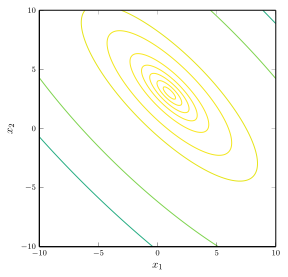

In [20]:
###################################################################################
using Plots, LaTeXStrings, Printf, LinearAlgebra, Dates
pgfplotsx() #pyplot()

# Booth's function
fp(x1,x2) = (x1 + 2x2 - 7)^2 + (2x1 + x2 - 5)^2

x1 = -10:0.1:10
x2 = -10:0.1:10

pl1 = contour(x1, x2, fp, framestyle = :box,
    levels=[0.5,2,5,10,20,50,100,500,1000], 
    c = cgrad(:viridis, rev = true), 
    ylab = L"x_2", 
    xlab = L"x_1",
    xlims = (-10,10),
    ylims = (-10,10),
    legend = false,
    grid = false,
    contour_labels = false,
    bins = 150,
    label = false,
    size=(400,400))

In [21]:
function step!(f, vars, x0)
    # Simbolic part
    # Gradient
    ∇f = [diff(f,var) for var in vars]

    # Gradient
    H = hessian(f, vars)
    
    # Numeric evaluations for ∇f & H
    n∇f = ∇f
    for i=1:length(x0)
        n∇f = subs.(n∇f, (vars[i] => x0[i]))
    end
    
    nH = H
    for i=1:length(x0)
        nH = subs.(nH, (vars[i] => x0[i]))
    end
    
    return x0 - inv(N(nH))*N(n∇f)
end

step! (generic function with 1 method)

In [22]:
using SymPy

x1, x2 = Sym("x1, x2")

# Booth's function
f = (x1 + 2x2 - 7)^2 + (2x1 + x2 - 5)^2

points = []
x0 = [9, 8]
vars = [x1, x2] 

xk = step!(f, vars, x0)

2-element Array{Float64,1}:
 1.0
 3.0

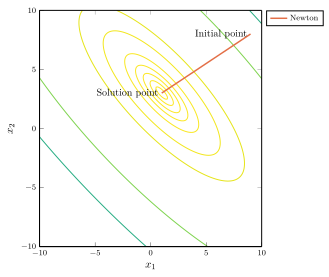

In [23]:
# save points
push!(points, (x0))
push!(points, (xk))

plot!([P[1] for P in points], [P[2] for P in points], label = "Newton", legend = true, lw = 1.5)
annotate!(x0[1], x0[2], Plots.text("Initial point", :right, 10, "courier", :black))
annotate!(xk[1], xk[2], Plots.text("Solution point", :right, 10, "courier", :black))

display(pl1)
savefig(pl1, "6.1 Newton.svg")